# Data Wrangling Project

## Contents

1. Gather
2. Assess
3. Clean
4. Store
5. Insights and Visualizations

##### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
from timeit import default_timer as timer
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
%matplotlib inline

## Gather

#### 1. First piece of data (format=csv, source=local storage)

In [2]:
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

#### 2. Second piece of data (format=tsv, source=remote server storage)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [4]:
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [5]:
image_predictions_df = pd.read_csv('image_predictions.tsv', sep='\t')

#### 3. Third piece of data (format=json, source=Twitter API)

## <font color='red'> Don't run next 3 cells</font>

I have used my twitter developer credentials to fetch the data using the tweepy api, and then stored it in tweet_json.txt file, so jump over the next 3 cells to start fetching the data from this file directly.

In [48]:
consumer_key = '?'
consumer_secret = '?'
access_token = '?'
access_token_secret = '?'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

twitter_api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [58]:
start = timer()
with open('tweet_json.txt', mode='w') as file:
    for _id in twitter_archive_df.tweet_id:
        try:
            tweet = twitter_api.get_status(_id, tweet_mode='extended')
            json_str = json.dumps(tweet._json)
            file.write(json_str+'\n')
            print(_id)
        except tweepy.TweepError as e:
            print('No status found with that ID: '+str(_id))
end = timer()
print(end-start)

892420643555336193
892177421306343426
891815181378084864
891689557279858688
891327558926688256
891087950875897856
890971913173991426
890729181411237888
890609185150312448
890240255349198849
890006608113172480
889880896479866881
889665388333682689
889638837579907072
889531135344209921
889278841981685760
888917238123831296
888804989199671297
888554962724278272
No status found with that ID: 888202515573088257
888078434458587136
887705289381826560
887517139158093824
887473957103951883
887343217045368832
887101392804085760
886983233522544640
886736880519319552
886680336477933568
886366144734445568
886267009285017600
886258384151887873
886054160059072513
885984800019947520
885528943205470208
885518971528720385
885311592912609280
885167619883638784
884925521741709313
884876753390489601
884562892145688576
884441805382717440
884247878851493888
884162670584377345
883838122936631299
883482846933004288
883360690899218434
883117836046086144
882992080364220416
882762694511734784
882627270321602560
8

823719002937630720
823699002998870016
823581115634085888
823333489516937216
823322678127919110
823269594223824897
822975315408461824
822872901745569793
822859134160621569
822647212903690241
822610361945911296
822489057087389700
822462944365645825
822244816520155136
822163064745328640
821886076407029760
821813639212650496
821765923262631936
821522889702862852
821421320206483457
821407182352777218
821153421864615936
821149554670182400
821107785811234820
821044531881721856
820837357901512704
820749716845686786
820690176645140481
820494788566847489
820446719150292993
820314633777061888
820078625395449857
820013781606658049
819952236453363712
819924195358416896
819711362133872643
819588359383371776
819347104292290561
819238181065359361
819227688460238848
819015337530290176
819015331746349057
819006400881917954
819004803107983360
818646164899774465
818627210458333184
818614493328580609
818588835076603904
818536468981415936
818307523543449600
818259473185828864
818145370475810820
817908911860

Rate limit reached. Sleeping for: 170


780543529827336192
780496263422808064
780476555013349377
780459368902959104
780192070812196864
780092040432480260
780074436359819264
779834332596887552
779377524342161408
779124354206535695
No status found with that ID: 779123168116150273
779056095788752897
778990705243029504
778774459159379968
778764940568104960
778748913645780993
778650543019483137
778624900596654080
778408200802557953
778396591732486144
778383385161035776
778286810187399168
778039087836069888
778027034220126208
777953400541634568
777885040357281792
777684233540206592
777641927919427584
777621514455814149
777189768882946048
776819012571455488
776813020089548800
776477788987613185
776249906839351296
776218204058357768
776201521193218049
776113305656188928
776088319444877312
775898661951791106
775842724423557120
775733305207554048
775729183532220416
775364825476165632
775350846108426240
No status found with that ID: 775096608509886464
775085132600442880
774757898236878852
774639387460112384
774314403806253056
773985732

723688335806480385
723673163800948736
723179728551723008
722974582966214656
722613351520608256
721503162398597120
721001180231503872
720785406564900865
720775346191278080
720415127506415616
720389942216527872
720340705894408192
720059472081784833
720043174954147842
719991154352222208
719704490224398336
719551379208073216
719367763014393856
719339463458033665
719332531645071360
718971898235854848
718939241951195136
718631497683582976
718613305783398402
718540630683709445
718460005985447936
718454725339934721
718246886998687744
718234618122661888
717841801130979328
717790033953034240
717537687239008257
717428917016076293
717421804990701568
717047459982213120
717009362452090881
716802964044845056
716791146589110272
716730379797970944
716447146686459905
716439118184652801
716285507865542656
716080869887381504
715928423106027520
715758151270801409
715733265223708672
715704790270025728
715696743237730304
715680795826982913
715360349751484417
715342466308784130
715220193576927233
715200624753

686377065986265092
686358356425093120
686286779679375361
686050296934563840
686035780142297088
686034024800862208
686007916130873345
686003207160610816
685973236358713344
685943807276412928
685906723014619143
685681090388975616
685667379192414208
685663452032069632
685641971164143616
685547936038666240
685532292383666176
685325112850124800
685321586178670592
685315239903100929
685307451701334016
685268753634967552
685198997565345792
685169283572338688
684969860808454144
684959798585110529
684940049151070208
684926975086034944
684914660081053696
684902183876321280
684880619965411328
684830982659280897
684800227459624960
684594889858887680
684588130326986752
684567543613382656
684538444857667585
684481074559381504
684460069371654144
684241637099323392
684225744407494656
684222868335505415
684200372118904832
684195085588783105
684188786104872960
684177701129875456


Rate limit reached. Sleeping for: 614


684147889187209216
684122891630342144
684097758874210310
683857920510050305
683852578183077888
683849932751646720
683834909291606017
683828599284170753
683773439333797890
683742671509258241
683515932363329536
683498322573824003
683481228088049664
683462770029932544
683449695444799489
683391852557561860
683357973142474752
683142553609318400
683111407806746624
683098815881154561
683078886620553216
683030066213818368
682962037429899265
682808988178739200
682788441537560576
682750546109968385
682697186228989953
682662431982772225
682638830361513985
682429480204398592
682406705142087680
682393905736888321
682389078323662849
682303737705140231
682259524040966145
682242692827447297
682088079302213632
682059653698686977
682047327939461121
682032003584274432
682003177596559360
681981167097122816
681891461017812993
681694085539872773
681679526984871937
681654059175129088
681610798867845120
681579835668455424
681523177663676416
681340665377193984
681339448655802368
681320187870711809
681302363064

671122204919246848
671115716440031232
671109016219725825
670995969505435648
670842764863651840
670840546554966016
670838202509447168
670833812859932673
670832455012716544
670826280409919488
670823764196741120
670822709593571328
670815497391357952
670811965569282048
670807719151067136
670804601705242624
670803562457407488
670797304698376195
670792680469889025
670789397210615808
670786190031921152
670783437142401025
670782429121134593
670780561024270336
670778058496974848
670764103623966721
670755717859713024
670733412878163972
670727704916926465
670717338665226240
670704688707301377
670691627984359425
670679630144274432
670676092097810432
670668383499735048
670474236058800128
670468609693655041
670465786746662913
670452855871037440
670449342516494336
670444955656130560
670442337873600512
670435821946826752
670434127938719744
670433248821026816
670428280563085312
670427002554466305
670421925039075328
670420569653809152
670417414769758208
670411370698022913
670408998013820928
670403879788

In [60]:
#Time taken to fetch all tweets json data from tweepy in minutes
1537.36/60

25.622666666666664

-------------------------------------------------------------------------------------------------------


## <font color='red'> Resume Here</font>

In [6]:
data=[]
with open('tweet_json.txt', mode='r') as file:
    for line in file:
        tweet_dict = json.loads(line)
        data.append({'id':tweet_dict['id_str'], 'retweet_count':tweet_dict['retweet_count'], 'favorite_count':tweet_dict['favorite_count']})

In [7]:
tw_api_results_df = pd.DataFrame(data)

## Assess

#### Our dataset is distributed over 3 dataframes:
`twitter_archive_df`
`image_predictions_df`
`tw_api_results_df`

- <font color='red' size=4>Assesing `twitter_archive_df`</font>

In [8]:
twitter_archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

- Errorneous datatypes (tweet_id, timestamp, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)

In [10]:
twitter_archive_df.tweet_id.nunique()

2356

In [11]:
twitter_archive_df.text[twitter_archive_df.in_reply_to_status_id.isnull() == False].value_counts()

@RealKentMurphy 14/10 confirmed                                                                                                                                          1
After 22 minutes of careful deliberation this dog is being demoted to a 1/10. The longer you look at him the more terrifying he becomes                                  1
@HistoryInPics 13/10                                                                                                                                                     1
Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3                                           1
"Challenge completed" \n(pupgraded to 12/10) https://t.co/85dTK7XCXB                                                                                                     1
I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible      

- Presence of not original tweets as replys, noticed by the presence of non null values for in-reply and manually checked the links in text as shown below.
<img src='imgs/1.png' width='300px'>

In [12]:
twitter_archive_df.timestamp.sort_values()

2355    2015-11-15 22:32:08 +0000
2354    2015-11-15 23:05:30 +0000
2353    2015-11-15 23:21:54 +0000
2352    2015-11-16 00:04:52 +0000
2351    2015-11-16 00:24:50 +0000
2350    2015-11-16 00:30:50 +0000
2349    2015-11-16 00:35:11 +0000
2348    2015-11-16 00:49:46 +0000
2347    2015-11-16 00:55:59 +0000
2346    2015-11-16 01:01:59 +0000
2345    2015-11-16 01:22:45 +0000
2344    2015-11-16 01:52:02 +0000
2343    2015-11-16 01:59:36 +0000
2342    2015-11-16 02:38:37 +0000
2341    2015-11-16 03:22:39 +0000
2340    2015-11-16 03:44:34 +0000
2339    2015-11-16 03:55:04 +0000
2338    2015-11-16 04:02:55 +0000
2337    2015-11-16 14:57:41 +0000
2336    2015-11-16 15:14:19 +0000
2335    2015-11-16 16:11:11 +0000
2334    2015-11-16 16:37:02 +0000
2333    2015-11-16 19:31:45 +0000
2332    2015-11-16 20:01:42 +0000
2331    2015-11-16 20:32:58 +0000
2330    2015-11-16 21:10:36 +0000
2329    2015-11-16 21:54:18 +0000
2328    2015-11-16 23:23:41 +0000
2327    2015-11-17 00:06:54 +0000
2326    2015-1

- The time interval of this dataset is from 15-11-2015 to 01-08-2017

In [13]:
twitter_archive_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

- This variable tells the source platform for each tweet, it has 4 types only: Twitter for iPhone, Vine, Twitter Web Client, TweetDeck.
- `source` values are in html form, and having erroneous datatype.

In [14]:
twitter_archive_df.text.value_counts()

Instead of the usual nightly dog rate, I'm sharing this story with you. Meeko is 13/10 and would like your help \n\nhttps://t.co/Mj4j6QoIJk https://t.co/JdNE5oqYEV     1
We only rate dogs. Please don't send perfectly toasted marshmallows attempting to drive. Thank you... 13/10 https://t.co/nvZyyrp0kd                                     1
Meet Schnitzel. He's a Tropicana Floofboop. Getting too big for his favorite basket. 12/10 just so damn fluffy https://t.co/qjd0UJKYUY                                  1
This is Kreg. He's riding an invisible jet ski. 11/10 that's downright legendary https://t.co/BA5AV5dx6Y                                                                1
This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS                                        1
This is a northern Wahoo named Kohl. He runs this town. Chases tumbleweeds. Draws gun wicked fast. 11/10 legendary https://t.co/J4vn2rOYFk            

- `text` variable holds the free text of each tweet, and it's noticed that the text is written using internet slang vocabulary, the text also holds shortent links for photos attached with each tweet

In [15]:
twitter_archive_df.text[twitter_archive_df.retweeted_status_id.isnull() == False].value_counts()

RT @dog_rates: This is Hank. He's mischievous af. Doesn't even know what he was trying to do here. 8/10 quit the shit Hank damn https://t.c…        1
RT @dog_rates: When she says you're a good boy and you know you're a good boy because you're a good boy. 13/10 https://t.co/O5IUmRHRIh              1
RT @dog_rates: So this just changed my life. 13/10 please enjoy  https://t.co/dsv4xAtfv7                                                            1
RT @dog_rates: Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t…        1
RT @dog_rates: This is an East African Chalupa Seal. We only rate dogs. Please only send in dogs. Thank you... 10/10 https://t.co/iHe6liLwWR        1
RT @dog_rates: This is Butter. She can have whatever she wants forever. 12/10 would hug softly https://t.co/x5gXRS1abq                              1
RT @dog_rates: This is Stubert. He just arrived. 10/10 https://t.co/HVGs5aAKAn                      

- Presence of not original tweets as retweets, noticed by the presence of non null values for retweet ids and after manual checks using the ids, it's noticed that the values in corresponding `text` variable is for the original tweets not the retweets.

In [16]:
twitter_archive_df.expanded_urls[twitter_archive_df.expanded_urls.isnull() == False].value_counts()

https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1                                                                                                                                                                              2
https://twitter.com/dog_rates/status/756288534030475264/photo/1,https://twitter.com/dog_rates/status/756288534030475264/photo/1,https://twitter.com/dog_rates/status/756288534030475264/photo/1,https://twitter.com/dog_rates/status/756288534030475264/photo/1                                              2
https://twitter.com/dog_rates/status/773308824254029826/photo/1                                                                                                                                                                                                                                              2
https://twitter.com/dog_rates/status/700747788515020802/photo/1                            

In [18]:
twitter_archive_df[twitter_archive_df.expanded_urls.isnull() == True].text.value_counts()

@RealKentMurphy 14/10 confirmed                                                                                                                                          1
Some clarification is required. The dog is singing Cher and that is more than worthy of an 11/10. Thank you                                                              1
After much debate this dog is being upgraded to 10/10. I repeat 10/10                                                                                                    1
@mount_alex3 13/10                                                                                                                                                       1
13/10 such a good doggo\n@spaghemily                                                                                                                                     1
PUPDATE: I've been informed that Augie was actually bringing his family these flowers when he tripped. Very good boy. Pupgraded to 11/10         

<img src='imgs/3.png'>

- These urls are links for the photos in the tweets.
- There are photos that occurrs twice in the dataset.
- It is noticed that the links formats of twitter tweets and photos are `twitter.com/[user_name]/status/[status_id]`, `twitter.com/[user_name]/status/[status_id]/photo[no.]`
- There are some missing expanded urls
- So expanded urls can tell us about the attachment of the tweet, it can be a photo, a vine video or a link for any other source

In [19]:
twitter_archive_df.rating_denominator.sort_values()

313       0
2335      2
516       7
1576     10
1575     10
1574     10
1573     10
1572     10
1563     10
1570     10
1569     10
1568     10
1567     10
1566     10
1565     10
1564     10
1577     10
1571     10
0        10
1562     10
1547     10
1548     10
1549     10
1550     10
1551     10
1552     10
1553     10
1554     10
1555     10
1556     10
       ... 
782      10
781      10
775      10
799      10
780      10
779      10
776      10
777      10
778      10
800      10
784      11
1068     11
1662     11
342      15
1663     16
1165     20
1598     20
1433     40
1202     50
1351     50
1274     50
433      70
1843     80
1254     80
1228     90
1635    110
1779    120
1634    130
902     150
1120    170
Name: rating_denominator, Length: 2356, dtype: int64

In [20]:
twitter_archive_df.rating_numerator.sort_values()

315        0
1016       0
2335       1
2261       1
2338       1
605        1
1446       1
1869       1
2091       1
2038       1
1940       1
1764       2
2310       2
1761       2
1920       2
2246       2
2237       2
2349       2
2326       2
2079       2
2305       3
1249       3
1898       3
1478       3
1692       3
2202       3
765        3
1928       3
1314       3
2183       3
        ... 
866       14
83        14
291       15
285       15
55        17
1663      20
516       24
1712      26
763       27
1433      44
1274      45
1202      50
1351      60
340       75
695       75
1254      80
433       84
1843      88
1228      99
1635     121
1634     143
1779     144
902      165
290      182
1120     204
2074     420
188      420
189      666
313      960
979     1776
Name: rating_numerator, Length: 2356, dtype: int64

In [21]:
twitter_archive_df[twitter_archive_df.rating_denominator==7].text.value_counts()

Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx    1
Name: text, dtype: int64

- Inconsistent rating scale, the denominator most of the time is 10, but it has some exceptions for 2 main reasons, either it was a mistake by the program that extracted the rating from the text, or it was a sarcastic move by the tweet author.

- Same goes for the numerator as well.

In [22]:
twitter_archive_df.name.value_counts()

None          745
a              55
Charlie        12
Lucy           11
Cooper         11
Oliver         11
Penny          10
Lola           10
Tucker         10
Winston         9
Bo              9
Sadie           8
the             8
an              7
Buddy           7
Bailey          7
Daisy           7
Toby            7
Milo            6
Bella           6
Dave            6
Jack            6
Oscar           6
Rusty           6
Stanley         6
Koda            6
Scout           6
Jax             6
Leo             6
Bentley         5
             ... 
Liam            1
William         1
Cedrick         1
Suki            1
Tebow           1
Antony          1
Augie           1
Bobbay          1
Snickers        1
Ole             1
Mark            1
Dot             1
Mairi           1
Lacy            1
Gert            1
Birf            1
Walker          1
Gustaf          1
Rhino           1
incredibly      1
Tango           1
Damon           1
Rumble          1
Ralph           1
Dewey     

- There are 745 tweets that couldn't be interpreted for names and left as `None`, and also some miss-interpreted values for names as (a, the, an, Sadie, Buddy)

In [23]:
twitter_archive_df.floofer.value_counts()[1] + twitter_archive_df.doggo.value_counts()[1] + twitter_archive_df.pupper.value_counts()[1] + twitter_archive_df.puppo.value_counts()[1]

394

- Some tweets couldn't successfully be interpreted for dog_stage, only 394 got interpretations.
- `floofer`, `doggo`, `pupper`, `puppo` are all values not variables.

------------------------------------------------------------------------------------------------------------

- <font color='red' size=4>Assesing `image_predictions_df`</font>

In [24]:
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [25]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


- Errorneous datatypes (tweet_id, img_num, p1, p2, p3)

In [26]:
image_predictions_df.tweet_id.nunique(), image_predictions_df.jpg_url.nunique()

(2075, 2009)

In [27]:
2356 - 2075

281

- 281 Tweets data are missing from the image predictions table

In [28]:
image_predictions_df.jpg_url.value_counts()

https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg    2
https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg                                            2
https://pbs.twimg.com/media/Cwx99rpW8AMk_Ie.jpg                                            2
https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg                                            2
https://pbs.twimg.com/media/CuRDF-XWcAIZSer.jpg                                            2
https://pbs.twimg.com/media/Cx5R8wPVEAALa9r.jpg                                            2
https://pbs.twimg.com/media/CvaYgDOWgAEfjls.jpg                                            2
https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg                                            2
https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg                                            2
https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg                       

In [29]:
image_predictions_df[image_predictions_df.jpg_url=='https://pbs.twimg.com/media/CsVO7ljW8AAckRD.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1448,776113305656188928,https://pbs.twimg.com/media/CsVO7ljW8AAckRD.jpg,1,mousetrap,0.777468,False,black_widow,0.09394,False,paddlewheel,0.017492,False
1605,800443802682937345,https://pbs.twimg.com/media/CsVO7ljW8AAckRD.jpg,1,mousetrap,0.777468,False,black_widow,0.09394,False,paddlewheel,0.017492,False


- Some images are duplicated, and after manual check of some of the tweets corresponding to duplicate images, it was found that this is because some of the tweets are only retweets that have the same images

In [30]:
image_predictions_df.img_num.sort_values()

0       1
1295    1
1294    1
1293    1
1292    1
1290    1
1289    1
1287    1
1285    1
1284    1
1283    1
1282    1
1296    1
1281    1
1277    1
1275    1
1274    1
1273    1
1272    1
1271    1
1270    1
1269    1
1267    1
1266    1
1265    1
1280    1
1297    1
1298    1
1302    1
1334    1
       ..
1920    4
1914    4
1437    4
1372    4
1342    4
144     4
1337    4
1161    4
1800    4
1795    4
1617    4
1766    4
1893    4
1954    4
1543    4
1542    4
1549    4
1717    4
1829    4
1716    4
1790    4
1325    4
1024    4
1934    4
779     4
1978    4
1496    4
1768    4
1713    4
2040    4
Name: img_num, Length: 2075, dtype: int64

In [31]:
image_predictions_df.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
Siberian_husky                20
German_shepherd               20
Cardigan                      19
web_site                      19
Eskimo_dog                    18
teddy                         18
beagle                        18
Maltese_dog                   18
Shetland_sheepdog             18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
Italian_greyhound             16
kuvasz                        16
          

In [32]:
image_predictions_df.p1_conf.sort_values()

38      0.044333
136     0.055379
1093    0.059033
1370    0.063152
246     0.070076
250     0.071124
145     0.071536
680     0.072885
701     0.081101
1831    0.082489
18      0.086502
109     0.088530
568     0.088540
301     0.089165
1627    0.090341
1503    0.090341
954     0.090508
277     0.096063
2074    0.097049
664     0.097232
789     0.097500
515     0.098283
1664    0.099804
731     0.100499
1723    0.100896
1037    0.105171
247     0.107317
876     0.107948
866     0.110587
1245    0.111493
          ...   
76      0.999091
1988    0.999120
2045    0.999201
863     0.999223
1872    0.999281
1548    0.999306
95      0.999335
611     0.999365
1711    0.999403
512     0.999484
168     0.999614
107     0.999647
1796    0.999715
1455    0.999823
1687    0.999828
1725    0.999833
331     0.999834
1014    0.999837
594     0.999846
475     0.999876
865     0.999885
45      0.999888
1447    0.999916
242     0.999924
230     0.999945
1372    0.999953
149     0.999956
1229    0.9999

- p1, p2, p3 are general prediction of the images, for some cases it's not even a dog breed.
- p1, p2, p3 are having different text formats, some lowercase and other uppercase, also it got _ between words.
- p1, p2, p3, p1_conf, p2_conf, p3_conf, p1_dog, p2_dog, p3_dog are not showing the most proper breed prediction in a simple column

- <font color='red' size=4>Assesing `tw_api_results_df`</font>


In [33]:
tw_api_results_df

,favorite_count,id,retweet_count
0,36614,892420643555336193,7801
1,31549,892177421306343426,5776
2,23770,891815181378084864,3824
3,39938,891689557279858688,7959
4,38135,891327558926688256,8604
5,19185,891087950875897856,2868
6,11184,890971913173991426,1888
7,61729,890729181411237888,17418
8,26435,890609185150312448,3960
9,30217,890240255349198849,6784


In [34]:
tw_api_results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
favorite_count    2331 non-null int64
id                2331 non-null object
retweet_count     2331 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


In [35]:
tw_api_results_df.id.nunique()

2331

In [36]:
2356 - 2331

25

- 25 Tweets data couldn't be retrieved from the twitter api, probably because those tweets are deleted, that's what I got when checked one of those tweets manually.

<img src='imgs/2.png' width=500px>

In [37]:
tw_api_results_df.sort_values(by='favorite_count')

,favorite_count,id,retweet_count
913,0,753298634498793472,5816
702,0,783347506784731136,5743
684,0,786036967502913536,7273
240,0,845098359547420673,7665
676,0,786729988674449408,2496
674,0,787111942498508800,6968
668,0,788070120937619456,3549
664,0,788552643979468800,7450
254,0,841833993020538882,15234
659,0,789280767834746880,5125


In [38]:
tw_api_results_df.sort_values(by='retweet_count')

,favorite_count,id,retweet_count
279,144,838085839343206401,1
262,177,840698636975636481,2
328,64,832088576586297345,2
1271,51,707983188426153984,2
109,117,870726314365509632,3
29,113,886267009285017600,4
1056,112,738891149612572673,6
54,120,881633300179243008,7
63,297,879674319642796034,10
411,262,821153421864615936,10


- Some retweet counts and favourite counts are relatively lower than the majority, after manual check for corresponding tweets it was noticed that these are replies to other tweets or retweets but probably not original tweets

### <font color='red'>Assesment Summary</font>

#### Quality
##### `twitter_archive` table
1. Errorneous datatypes (tweet_id, timestamp, source, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)
2. Presence of not original tweets as replys and retweets.
3. `source` values are in html form.
4. Inconsistent rating scale (Both numerator and denominator)
5. `None, a, the, an, Sadie, Buddy` invalid values for dogs names
6. Many tweets couldn't successfully be interpreted for dog_stage (`floofer`, `doggo`, `pupper`, `puppo`)
7. There are some missing expanded urls

##### `image_predictions` table
8. Errorneous datatypes (tweet_id, img_num, p1, p2, p3)
9. Duplicate `jpg_url`, probably due to presence of retweets
10. p1, p2, p3 having values that are not dog breeds.
11. p1, p2, p3 are having inconsistent text formats (lowercase and uppercase and _ inbetween)
12. Missing predictions for some tweets that are still in the twitter archive. 

##### `twitter_api_results` table
13. Missing data for some tweets that are still in the twitter archive.

#### Tidiness
1. `floofer`, `doggo`, `pupper`, `puppo` are all values not variables.
2. `tweet_id` is duplicated in the three tables.
3. Retweet count and Favourite Count in `twitter_api_results` should be moved to `twitter_archive` table
4. The prediction columns in `image_predictions` should be concluded to only two columns that show the most proper predicted breed for the dog in the tweet.
5. The prediction of each tweet should be moved to the main archive dataframe

## Clean

##### Cleaning Strategy

- We need to have a constant number of tweets that have complete values for all the important variables across the 3 tables.
- In this analysis we can give up the rows that miss important data that can't be collected using further processing.
- Having a smaller number of tweets that include most important data is bettet than having large number of tweets having a lot of missing data

In [39]:
twitter_archive_df_clean = twitter_archive_df.copy()
image_predictions_df_clean = image_predictions_df.copy()
tw_api_results_df_clean = tw_api_results_df.copy()

##### Define
Change the tweet_id datatype to str in both archive and predictions dataframes, and the api_results dataframe's tweet_id datatype is already str.

##### Code

In [40]:
twitter_archive_df_clean.tweet_id = twitter_archive_df_clean.tweet_id.astype(str)
image_predictions_df_clean.tweet_id = image_predictions_df_clean.tweet_id.astype(str)

##### Test

In [41]:
type(twitter_archive_df_clean.tweet_id[5]), type(image_predictions_df_clean.tweet_id[3]), type(tw_api_results_df_clean.id[7])

(str, str, str)

--------------------------------------------------------------------------------------------------------------

##### Define
Remove the replys and retweets by applying a condition of in_reply_id and retweet_id to be null, and then droping columns related to reply and retweet ids.

##### Code

In [42]:
twitter_archive_df_clean = twitter_archive_df_clean[(twitter_archive_df_clean.in_reply_to_status_id.isnull() == True) & (twitter_archive_df_clean.retweeted_status_id.isnull() == True)]

In [43]:
twitter_archive_df_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)

##### Test

In [44]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(2), object(10)
memory usage: 213.0+ KB


##### Define
After the last 2 cleaning tasks, there are only 3 tweets that don't have expanded urls records, and after manual check it was found that those tweets don't include photos, so we will remove those tweets

##### Code

In [45]:
twitter_archive_df_clean = twitter_archive_df_clean[twitter_archive_df_clean.expanded_urls.isnull() == False]

##### Test

In [46]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2094 non-null object
timestamp             2094 non-null object
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: int64(2), object(10)
memory usage: 212.7+ KB


In [47]:
twitter_archive_df_clean.expanded_urls.value_counts()

https://vine.co/v/ea0OwvPTx9l                                                                                                                                                                                                                                                                          2
https://vine.co/v/i7nWzrenw5h                                                                                                                                                                                                                                                                          1
https://twitter.com/dog_rates/status/667435689202614272/photo/1                                                                                                                                                                                                                                        1
https://twitter.com/dog_rates/status/699779630832685056/photo/1,https://twitter.com/dog_rates/status/69977963

In [48]:
twitter_archive_df_clean[twitter_archive_df_clean.expanded_urls=='https://vine.co/v/ea0OwvPTx9l'].text.value_counts()

Vine will be deeply missed. This was by far my favorite one. 14/10 https://t.co/roqIxCvEB3                                                1
Never forget this vine. You will not stop watching for at least 15 minutes. This is the second coveted.. 13/10 https://t.co/roqIxCvEB3    1
Name: text, dtype: int64

##### Define
Remove one of the tweets that includes duplicated expanded urls

##### Code

In [49]:
twitter_archive_df_clean = twitter_archive_df_clean[twitter_archive_df_clean.text != 'Never forget this vine. You will not stop watching for at least 15 minutes. This is the second coveted.. 13/10 https://t.co/roqIxCvEB3']

##### Test

In [50]:
twitter_archive_df_clean[twitter_archive_df_clean.expanded_urls=='https://vine.co/v/ea0OwvPTx9l'].text.value_counts()

Vine will be deeply missed. This was by far my favorite one. 14/10 https://t.co/roqIxCvEB3    1
Name: text, dtype: int64

In [51]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2093 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2093 non-null object
timestamp             2093 non-null object
source                2093 non-null object
text                  2093 non-null object
expanded_urls         2093 non-null object
rating_numerator      2093 non-null int64
rating_denominator    2093 non-null int64
name                  2093 non-null object
doggo                 2093 non-null object
floofer               2093 non-null object
pupper                2093 non-null object
puppo                 2093 non-null object
dtypes: int64(2), object(10)
memory usage: 212.6+ KB


##### Define 
Move the retweet_count and favorite_count from to the main archive dataframe

##### Code

In [52]:
twitter_archive_df_clean = pd.merge(left=twitter_archive_df_clean, right=tw_api_results_df_clean, left_on='tweet_id', right_on='id', how='left')

In [53]:
twitter_archive_df_clean.drop(columns=['id'], inplace=True)

##### Test

In [54]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2093 entries, 0 to 2092
Data columns (total 14 columns):
tweet_id              2093 non-null object
timestamp             2093 non-null object
source                2093 non-null object
text                  2093 non-null object
expanded_urls         2093 non-null object
rating_numerator      2093 non-null int64
rating_denominator    2093 non-null int64
name                  2093 non-null object
doggo                 2093 non-null object
floofer               2093 non-null object
pupper                2093 non-null object
puppo                 2093 non-null object
favorite_count        2086 non-null float64
retweet_count         2086 non-null float64
dtypes: float64(2), int64(2), object(10)
memory usage: 245.3+ KB


In [55]:
twitter_archive_df_clean[twitter_archive_df_clean.retweet_count.isnull() == True].text.value_counts()

This is Luna. It's her first time outside and a bee stung her nose. Completely h*ckin uncalled for. 13/10 where's the bee I just wanna talk https://t.co/2RYiLGHuPN    1
This is Charlie. He pouts until he gets to go on the swing. 12/10 manipulative af https://t.co/ilwQqWFKCh                                                              1
This is Lucy. She has a portrait of herself on her ear. Excellent for identification pupposes. 13/10 innovative af https://t.co/uNmxbL2lns                             1
This is Reggie. He hugs everyone he meets. 12/10 keep spreading the love Reggie https://t.co/uMfhduaate                                                                1
Meet Sammy. At first I was like "that's a snowflake. we only rate dogs," but he would've melted by now, so 10/10 https://t.co/MQfPK4zwuh                               1
This is Harry. His ears are activated one at a time. Incredibly rare to witness in person. Very special moment here. 13/10 blessed as h*ck https://t.co/ejH

- There are only 7 tweets that don't have retweets and favourite counts, and after manual check, it was found that the tweets were deleted from the account.

##### Define
Remove the deleted tweets from twitter at the moment of this study

##### Code

In [56]:
twitter_archive_df_clean = twitter_archive_df_clean[twitter_archive_df_clean.retweet_count.isnull()==False]

##### Test

In [57]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2086 entries, 0 to 2092
Data columns (total 14 columns):
tweet_id              2086 non-null object
timestamp             2086 non-null object
source                2086 non-null object
text                  2086 non-null object
expanded_urls         2086 non-null object
rating_numerator      2086 non-null int64
rating_denominator    2086 non-null int64
name                  2086 non-null object
doggo                 2086 non-null object
floofer               2086 non-null object
pupper                2086 non-null object
puppo                 2086 non-null object
favorite_count        2086 non-null float64
retweet_count         2086 non-null float64
dtypes: float64(2), int64(2), object(10)
memory usage: 244.5+ KB


##### Define
Create a column called dog_stage to state if the dog is doggo, floofer, pupper, puppo or unknown

##### Code

In [58]:
def fix_dog_stage(df):
    if df.doggo == 'doggo':
        return 'doggo'
    elif df.floofer == 'floofer':
        return 'floofer'
    elif df.pupper == 'pupper':
        return 'pupper'
    elif df.puppo == 'puppo':
        return 'puppo'
    else:
        return 'Unknown'

In [59]:
twitter_archive_df_clean['dog_stage'] = twitter_archive_df_clean.apply(fix_dog_stage, axis=1)

##### Test

In [60]:
twitter_archive_df_clean.dog_stage.value_counts()

Unknown    1752
pupper      220
doggo        82
puppo        23
floofer       9
Name: dog_stage, dtype: int64

In [61]:
twitter_archive_df[(twitter_archive_df.pupper=='pupper')&(twitter_archive_df.doggo=='doggo')].text.value_counts()

This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj                        1
Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8                                1
RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda                                                                               1
Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze                                                                                                   1
This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd    1
Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda                                                                            

- It looks that those columns (pupper, doggo, puppo, floofer) can have multiple values for same dog, e.g a dog is stated as a doggo and a pupper at the same time, so I think to fix that we should reanalyze the tweets text with more efficient algorithm, however I think that such an issue is out of the scope of this analysis.

##### Define
Remove all the columns related to dog_stage as it's unfixable at the momen and won't be useful for analysis

##### Code

In [62]:
twitter_archive_df_clean.drop(columns=['doggo', 'floofer','pupper','puppo','dog_stage'], inplace=True)

##### Test

In [63]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2086 entries, 0 to 2092
Data columns (total 10 columns):
tweet_id              2086 non-null object
timestamp             2086 non-null object
source                2086 non-null object
text                  2086 non-null object
expanded_urls         2086 non-null object
rating_numerator      2086 non-null int64
rating_denominator    2086 non-null int64
name                  2086 non-null object
favorite_count        2086 non-null float64
retweet_count         2086 non-null float64
dtypes: float64(2), int64(2), object(6)
memory usage: 179.3+ KB


##### Define
Move the prediction results to the main archive dataframe

##### Code

In [64]:
twitter_archive_df_clean = pd.merge(left=twitter_archive_df_clean, right=image_predictions_df_clean, on='tweet_id', how='left')

##### Test

In [65]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2086 entries, 0 to 2085
Data columns (total 21 columns):
tweet_id              2086 non-null object
timestamp             2086 non-null object
source                2086 non-null object
text                  2086 non-null object
expanded_urls         2086 non-null object
rating_numerator      2086 non-null int64
rating_denominator    2086 non-null int64
name                  2086 non-null object
favorite_count        2086 non-null float64
retweet_count         2086 non-null float64
jpg_url               1964 non-null object
img_num               1964 non-null float64
p1                    1964 non-null object
p1_conf               1964 non-null float64
p1_dog                1964 non-null object
p2                    1964 non-null object
p2_conf               1964 non-null float64
p2_dog                1964 non-null object
p3                    1964 non-null object
p3_conf               1964 non-null float64
p3_dog                1964 no

##### Define
Change the timestamp column datatype to datetime datatype

##### Code

In [66]:
twitter_archive_df_clean.timestamp = pd.to_datetime(twitter_archive_df_clean.timestamp)

##### Test

In [67]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2086 entries, 0 to 2085
Data columns (total 21 columns):
tweet_id              2086 non-null object
timestamp             2086 non-null datetime64[ns, UTC]
source                2086 non-null object
text                  2086 non-null object
expanded_urls         2086 non-null object
rating_numerator      2086 non-null int64
rating_denominator    2086 non-null int64
name                  2086 non-null object
favorite_count        2086 non-null float64
retweet_count         2086 non-null float64
jpg_url               1964 non-null object
img_num               1964 non-null float64
p1                    1964 non-null object
p1_conf               1964 non-null float64
p1_dog                1964 non-null object
p2                    1964 non-null object
p2_conf               1964 non-null float64
p2_dog                1964 non-null object
p3                    1964 non-null object
p3_conf               1964 non-null float64
p3_dog          

##### Define 
Fix the source values by removing the html format and leave the source value only, then convert to category datatype

##### Code

In [68]:
twitter_archive_df_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1956
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          90
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [69]:
def fix_source(tweet):
    if tweet.source == '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':
        return 'Twitter for iPhone'
    elif tweet.source == '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':
        return 'Vine'
    elif tweet.source == '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>':
        return 'Twitter Web Client'
    elif tweet.source == '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>':
        return 'TweetDeck'
    else:
        return 'Unknown'

In [70]:
twitter_archive_df_clean.source = twitter_archive_df_clean.apply(fix_source, axis=1)

In [71]:
twitter_archive_df_clean.source = twitter_archive_df_clean.source.astype('category')

##### Test

In [72]:
twitter_archive_df_clean.source.value_counts()

Twitter for iPhone    1956
Vine                    90
Twitter Web Client      30
TweetDeck               10
Name: source, dtype: int64

##### Define
Detect the original tweets that includes twitter photos only and not any other links or videos

##### Code

In [73]:
twitter_archive_df_clean.expanded_urls.value_counts()

https://vine.co/v/i7nWzrenw5h                                                                                                                                                                                                                                                                          1
https://twitter.com/dog_rates/status/667435689202614272/photo/1                                                                                                                                                                                                                                        1
https://twitter.com/dog_rates/status/699779630832685056/photo/1,https://twitter.com/dog_rates/status/699779630832685056/photo/1                                                                                                                                                                        1
https://www.gofundme.com/help-my-baby-sierra-get-better,https://twitter.com/dog_rates/status/8732137756329779

In [74]:
twitter_archive_df_clean['has_image'] = twitter_archive_df_clean.expanded_urls.str.match(r'https://twitter.com/dog_rates/status/')

##### Test

In [75]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2086 entries, 0 to 2085
Data columns (total 22 columns):
tweet_id              2086 non-null object
timestamp             2086 non-null datetime64[ns, UTC]
source                2086 non-null category
text                  2086 non-null object
expanded_urls         2086 non-null object
rating_numerator      2086 non-null int64
rating_denominator    2086 non-null int64
name                  2086 non-null object
favorite_count        2086 non-null float64
retweet_count         2086 non-null float64
jpg_url               1964 non-null object
img_num               1964 non-null float64
p1                    1964 non-null object
p1_conf               1964 non-null float64
p1_dog                1964 non-null object
p2                    1964 non-null object
p2_conf               1964 non-null float64
p2_dog                1964 non-null object
p3                    1964 non-null object
p3_conf               1964 non-null float64
p3_dog        

In [76]:
twitter_archive_df_clean.has_image.value_counts()

True     1936
False     150
Name: has_image, dtype: int64

##### Define
Fix the denominators values to be consistent across all the tweets

##### Code

In [77]:
twitter_archive_df_clean.rating_denominator.value_counts()

10     2069
50        3
11        2
80        2
7         1
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

In [78]:
twitter_archive_df_clean[twitter_archive_df_clean.rating_denominator!=10].text.count()

17

- By checking the individual errors of denominators values that are not equal to 10, some are due to wrong interpretations by the text analyzer algorithm used to extract the rating from the text and others due to group rating for a group of dogs in one photo.

- I will manually fix the text analyzer errors, but I will only remove the rows having groups of dogs as the study is interested only for individual dogs.

In [79]:
fixed_texts = ['This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq'
              , 'This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5'
              , 'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'
              , 'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ'
              ]
fixed_numerators = [11, 10, 9, 14]
fixed_denominators = [10, 10, 10, 10]
twitter_archive_df_clean.reset_index()

for i in range(4):
    twitter_archive_df_clean.loc[twitter_archive_df_clean.text==fixed_texts[i], 'rating_numerator'] = fixed_numerators[i]
    twitter_archive_df_clean.loc[twitter_archive_df_clean.text==fixed_texts[i], 'rating_denominator'] = fixed_denominators[i]

In [80]:
twitter_archive_df_clean[twitter_archive_df_clean.rating_denominator!=10].text.count()

13

In [81]:
twitter_archive_df_clean = twitter_archive_df_clean[twitter_archive_df_clean.rating_denominator==10]

##### Test

In [82]:
twitter_archive_df_clean[twitter_archive_df_clean.rating_denominator!=10].text.count()

0

In [83]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2085
Data columns (total 22 columns):
tweet_id              2073 non-null object
timestamp             2073 non-null datetime64[ns, UTC]
source                2073 non-null category
text                  2073 non-null object
expanded_urls         2073 non-null object
rating_numerator      2073 non-null int64
rating_denominator    2073 non-null int64
name                  2073 non-null object
favorite_count        2073 non-null float64
retweet_count         2073 non-null float64
jpg_url               1951 non-null object
img_num               1951 non-null float64
p1                    1951 non-null object
p1_conf               1951 non-null float64
p1_dog                1951 non-null object
p2                    1951 non-null object
p2_conf               1951 non-null float64
p2_dog                1951 non-null object
p3                    1951 non-null object
p3_conf               1951 non-null float64
p3_dog        

##### Define
Fix the wrong names by assigning None str value to them

##### Code

In [84]:
twitter_archive_df_clean.name.value_counts()

None        590
a            54
Oliver       10
Lucy         10
Cooper       10
Charlie      10
Penny         9
Tucker        9
Lola          8
Sadie         8
Winston       8
Toby          7
Daisy         7
the           7
Bella         6
Jax           6
Bailey        6
Koda          6
Bo            6
Stanley       6
Oscar         6
an            6
Leo           5
Milo          5
Rusty         5
Scout         5
Buddy         5
Louis         5
Bentley       5
Dave          5
           ... 
Beckham       1
Kawhi         1
Mingus        1
Seamus        1
Beebop        1
Betty         1
Jamesy        1
Monkey        1
Marvin        1
River         1
Skye          1
Dixie         1
Logan         1
Ole           1
Mark          1
Dot           1
Mairi         1
Lacy          1
Gert          1
Birf          1
Walker        1
Gustaf        1
Snickers      1
Rhino         1
Tango         1
Damon         1
Rumble        1
Ralph         1
Dewey         1
Daniel        1
Name: name, Length: 952,

In [85]:
wrong_names = ['a', 'the', 'an', 'Sadie', 'Buddy']

for i in range(len(wrong_names)):
    twitter_archive_df_clean.loc[twitter_archive_df_clean.name == wrong_names[i] , 'name'] = 'None'

##### Test

In [86]:
twitter_archive_df_clean.name.value_counts()

None        670
Lucy         10
Oliver       10
Charlie      10
Cooper       10
Tucker        9
Penny         9
Lola          8
Winston       8
Toby          7
Daisy         7
Bella         6
Jax           6
Bailey        6
Koda          6
Oscar         6
Stanley       6
Bo            6
Scout         5
Chester       5
Rusty         5
Milo          5
Louis         5
Leo           5
Bentley       5
Dave          5
Boomer        4
very          4
Sophie        4
Derek         4
           ... 
Beckham       1
Kawhi         1
Mingus        1
Seamus        1
Beebop        1
Jamesy        1
Autumn        1
Monkey        1
Marvin        1
River         1
Skye          1
Dixie         1
Logan         1
Ole           1
Mark          1
Dot           1
Mairi         1
Lacy          1
Gert          1
Birf          1
Walker        1
Gustaf        1
Snickers      1
Rhino         1
Tango         1
Damon         1
Rumble        1
Ralph         1
Dewey         1
Daniel        1
Name: name, Length: 947,

##### Define
Change the type of retweet count and favorite count to int

##### Code 

In [87]:
twitter_archive_df_clean.retweet_count = twitter_archive_df_clean.retweet_count.astype(int)
twitter_archive_df_clean.favorite_count = twitter_archive_df_clean.favorite_count.astype(int)

##### Test

In [88]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2085
Data columns (total 22 columns):
tweet_id              2073 non-null object
timestamp             2073 non-null datetime64[ns, UTC]
source                2073 non-null category
text                  2073 non-null object
expanded_urls         2073 non-null object
rating_numerator      2073 non-null int64
rating_denominator    2073 non-null int64
name                  2073 non-null object
favorite_count        2073 non-null int32
retweet_count         2073 non-null int32
jpg_url               1951 non-null object
img_num               1951 non-null float64
p1                    1951 non-null object
p1_conf               1951 non-null float64
p1_dog                1951 non-null object
p2                    1951 non-null object
p2_conf               1951 non-null float64
p2_dog                1951 non-null object
p3                    1951 non-null object
p3_conf               1951 non-null float64
p3_dog            

##### Define
Remove the tweets that don't have twitter photos

##### Code

In [89]:
twitter_archive_df_clean.has_image.value_counts()

True     1924
False     149
Name: has_image, dtype: int64

In [90]:
twitter_archive_df_clean = twitter_archive_df_clean[twitter_archive_df_clean.has_image==True]

##### Test

In [91]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1924 entries, 0 to 2085
Data columns (total 22 columns):
tweet_id              1924 non-null object
timestamp             1924 non-null datetime64[ns, UTC]
source                1924 non-null category
text                  1924 non-null object
expanded_urls         1924 non-null object
rating_numerator      1924 non-null int64
rating_denominator    1924 non-null int64
name                  1924 non-null object
favorite_count        1924 non-null int32
retweet_count         1924 non-null int32
jpg_url               1924 non-null object
img_num               1924 non-null float64
p1                    1924 non-null object
p1_conf               1924 non-null float64
p1_dog                1924 non-null object
p2                    1924 non-null object
p2_conf               1924 non-null float64
p2_dog                1924 non-null object
p3                    1924 non-null object
p3_conf               1924 non-null float64
p3_dog            

In [92]:
twitter_archive_df_clean.img_num = twitter_archive_df_clean.img_num.astype(str)

##### Define
Define only one prediction value for each tweet, it can be a dog breed or no prediction at all, and then remove all the unnecessary columns

##### Code

In [93]:
def fix_prediction(dog):
    if dog.p1_dog == True:
        return dog.p1
    elif dog.p2_dog == True:
        return dog.p2
    elif dog.p3_dog == True:
        return dog.p3
    else:
        return 'No Prediction'

In [94]:
def fix_prediction_confidence(dog):
    if dog.p1_dog == True:
        return dog.p1_conf
    elif dog.p2_dog == True:
        return dog.p2_conf
    elif dog.p3_dog == True:
        return dog.p3_conf
    else:
        return 0.0

In [95]:
twitter_archive_df_clean['prediction'] = twitter_archive_df_clean.apply(fix_prediction, axis=1)

In [96]:
twitter_archive_df_clean['prediction_confidence'] = twitter_archive_df_clean.apply(fix_prediction_confidence, axis=1)

In [97]:
twitter_archive_df_clean.drop(columns=['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'has_image'], inplace=True)

In [98]:
twitter_archive_df_clean.prediction = twitter_archive_df_clean.prediction.astype('category')

##### Test

In [99]:
twitter_archive_df_clean.prediction.value_counts()

No Prediction                  302
golden_retriever               153
Labrador_retriever              99
Pembroke                        93
Chihuahua                       89
pug                             62
toy_poodle                      48
chow                            47
Samoyed                         41
Pomeranian                      41
malamute                        32
Chesapeake_Bay_retriever        30
cocker_spaniel                  30
French_bulldog                  29
miniature_pinscher              24
German_shepherd                 21
Cardigan                        20
Eskimo_dog                      20
beagle                          20
Shih-Tzu                        20
Siberian_husky                  20
Maltese_dog                     19
Staffordshire_bullterrier       18
Shetland_sheepdog               18
Rottweiler                      18
Lakeland_terrier                17
Italian_greyhound               17
basset                          16
kuvasz              

In [100]:
twitter_archive_df_clean.prediction_confidence.sort_values()

0       0.000000
1260    0.000000
1243    0.000000
1242    0.000000
1238    0.000000
1229    0.000000
1228    0.000000
1225    0.000000
1210    0.000000
1201    0.000000
1195    0.000000
1175    0.000000
1168    0.000000
1161    0.000000
1153    0.000000
1265    0.000000
1132    0.000000
1126    0.000000
1124    0.000000
1120    0.000000
1113    0.000000
1090    0.000000
1087    0.000000
1068    0.000000
1021    0.000000
1020    0.000000
1017    0.000000
1016    0.000000
1014    0.000000
994     0.000000
          ...   
500     0.996541
2001    0.996709
1460    0.996720
173     0.996952
1327    0.997210
831     0.997310
1221    0.997445
227     0.997692
942     0.997750
1171    0.997860
1433    0.997953
148     0.998021
784     0.998201
1886    0.998275
1874    0.998335
1186    0.998544
1447    0.998830
1373    0.999044
2009    0.999091
87      0.999120
28      0.999201
1204    0.999223
1475    0.999365
271     0.999715
582     0.999823
370     0.999828
1041    0.999837
1616    0.9998

In [101]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1924 entries, 0 to 2085
Data columns (total 14 columns):
tweet_id                 1924 non-null object
timestamp                1924 non-null datetime64[ns, UTC]
source                   1924 non-null category
text                     1924 non-null object
expanded_urls            1924 non-null object
rating_numerator         1924 non-null int64
rating_denominator       1924 non-null int64
name                     1924 non-null object
favorite_count           1924 non-null int32
retweet_count            1924 non-null int32
jpg_url                  1924 non-null object
img_num                  1924 non-null object
prediction               1924 non-null category
prediction_confidence    1924 non-null float64
dtypes: category(2), datetime64[ns, UTC](1), float64(1), int32(2), int64(2), object(6)
memory usage: 190.2+ KB


##### Define
Fix the outlier numerator values

##### Code

In [102]:
twitter_archive_df_clean[twitter_archive_df_clean.rating_numerator>14].text.value_counts()

This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq    1
This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS                                     1
After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY                                                                                  1
This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh                                                                                       1
Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD                                                           1
Name: text, dtype: int64

In [103]:
twitter_archive_df_clean.loc[twitter_archive_df_clean.text==
                             'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD'
                             , 'rating_numerator'] = 12
twitter_archive_df_clean.loc[twitter_archive_df_clean.text==
                             'This is Atticus. He\'s quite simply America af. 1776/10 https://t.co/GRXwMxLBkh'
                             , 'rating_numerator'] = 14
twitter_archive_df_clean.loc[twitter_archive_df_clean.text==
                             'This is Sophie. She\'s a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq'
                             , 'rating_numerator'] = 12
twitter_archive_df_clean.loc[twitter_archive_df_clean.text==
                             'This is Logan, the Chow who lived. He solemnly swears he\'s up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS'
                             , 'rating_numerator'] = 10
twitter_archive_df_clean = twitter_archive_df_clean[twitter_archive_df_clean.rating_numerator!=420]

In [104]:
twitter_archive_df_clean = twitter_archive_df_clean[(twitter_archive_df_clean.rating_numerator>6) & (twitter_archive_df_clean.rating_numerator<15)]

##### Test

In [105]:
twitter_archive_df_clean.rating_numerator.value_counts()

12    436
10    418
11    390
13    236
9     150
8      95
7      51
14     34
Name: rating_numerator, dtype: int64

In [106]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1810 entries, 0 to 2085
Data columns (total 14 columns):
tweet_id                 1810 non-null object
timestamp                1810 non-null datetime64[ns, UTC]
source                   1810 non-null category
text                     1810 non-null object
expanded_urls            1810 non-null object
rating_numerator         1810 non-null int64
rating_denominator       1810 non-null int64
name                     1810 non-null object
favorite_count           1810 non-null int32
retweet_count            1810 non-null int32
jpg_url                  1810 non-null object
img_num                  1810 non-null object
prediction               1810 non-null category
prediction_confidence    1810 non-null float64
dtypes: category(2), datetime64[ns, UTC](1), float64(1), int32(2), int64(2), object(6)
memory usage: 179.3+ KB


##### Define
Fix the predictions names

##### Code

In [107]:
twitter_archive_df_clean.prediction = twitter_archive_df_clean.prediction.str.replace('_', ' ')

In [108]:
twitter_archive_df_clean.prediction = twitter_archive_df_clean.prediction.str.title()

##### Test

In [109]:
twitter_archive_df_clean.prediction.value_counts()

No Prediction                  232
Golden Retriever               152
Labrador Retriever              99
Pembroke                        90
Chihuahua                       86
Pug                             60
Toy Poodle                      48
Chow                            47
Samoyed                         41
Pomeranian                      40
Malamute                        32
Chesapeake Bay Retriever        30
Cocker Spaniel                  30
French Bulldog                  29
Miniature Pinscher              21
German Shepherd                 21
Eskimo Dog                      20
Siberian Husky                  20
Shih-Tzu                        20
Cardigan                        20
Beagle                          19
Rottweiler                      18
Maltese Dog                     18
Shetland Sheepdog               18
Staffordshire Bullterrier       18
Lakeland Terrier                17
Italian Greyhound               16
Kuvasz                          15
West Highland White 

## Store

Storing the main archive dataframe in a csv file as well as a database file

In [110]:
twitter_archive_df_clean.to_csv('twitter_archive_master.csv', index=False)

In [111]:
engine = create_engine('sqlite:///twitter_archive_master.db')

In [112]:
twitter_archive_df_clean.to_sql('master', engine, index=False)

## Insights and Visualizations

##### Number of tweets per each month

In [113]:
twitter_archive_df_clean.index = twitter_archive_df_clean['timestamp']

In [114]:
tweets_per_month = twitter_archive_df_clean.resample('M').tweet_id.count()

In [115]:
tweets_per_month

timestamp
2015-11-30 00:00:00+00:00    251
2015-12-31 00:00:00+00:00    321
2016-01-31 00:00:00+00:00    156
2016-02-29 00:00:00+00:00     99
2016-03-31 00:00:00+00:00    109
2016-04-30 00:00:00+00:00     52
2016-05-31 00:00:00+00:00     54
2016-06-30 00:00:00+00:00     76
2016-07-31 00:00:00+00:00     84
2016-08-31 00:00:00+00:00     58
2016-09-30 00:00:00+00:00     60
2016-10-31 00:00:00+00:00     65
2016-11-30 00:00:00+00:00     52
2016-12-31 00:00:00+00:00     52
2017-01-31 00:00:00+00:00     59
2017-02-28 00:00:00+00:00     58
2017-03-31 00:00:00+00:00     40
2017-04-30 00:00:00+00:00     37
2017-05-31 00:00:00+00:00     39
2017-06-30 00:00:00+00:00     40
2017-07-31 00:00:00+00:00     46
2017-08-31 00:00:00+00:00      2
Freq: M, Name: tweet_id, dtype: int64

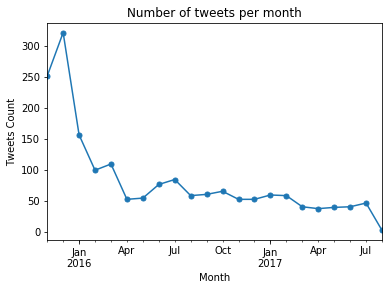

In [117]:
ax = tweets_per_month.plot(marker='.', markersize=10, title='Number of tweets per month');
ax.set_xlabel('Month');
ax.set_ylabel('Tweets Count');

In [143]:
tweets_per_month.mean()

82.27272727272727

##### Number of tweets per each source

In [118]:
# No of tweets per each source
twitter_archive_df_clean.source.value_counts()

Twitter for iPhone    1773
Twitter Web Client      27
TweetDeck               10
Vine                     0
Name: source, dtype: int64

##### Distribution of ratings

Text(0.5, 1.0, 'Ratings distribution')

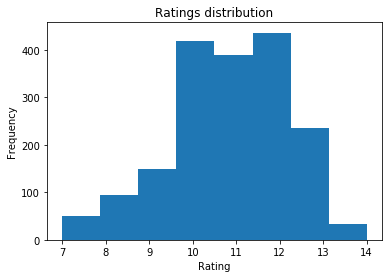

In [145]:
ax = twitter_archive_df_clean.rating_numerator.plot.hist(8);
ax.set_xlabel('Rating')
ax.set_title('Ratings distribution')

In [144]:
twitter_archive_df_clean.rating_numerator.mean()

10.891160220994475

##### Top 10 used names in WeRateDogs

In [120]:
top_10_used_names = twitter_archive_df_clean.name.value_counts().drop('None')[:10].sort_values()

Text(0.5, 1.0, 'Top 10 most used names in WeRateDogs')

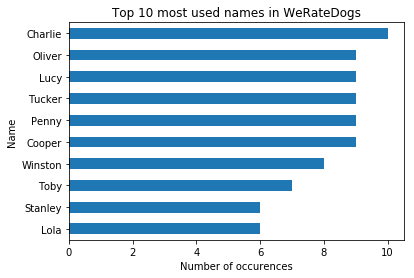

In [122]:
ax = top_10_used_names.plot(kind='barh');
ax.set_xlabel('Number of occurences');
ax.set_ylabel('Name');
ax.set_title('Top 10 most used names in WeRateDogs')

In [146]:
twitter_archive_df_clean[twitter_archive_df_clean.name=='Charlie'].text.value_counts()

This is Charlie. He fell asleep on a heating vent. Would puppreciate your assistance. 11/10 someone help Charlie https://t.co/Dhdx5HnQ4d                               1
This is Charlie. He's a West Side Niddlewog. Mucho fluffy. 12/10 would pet so damn well https://t.co/B9dOrmnPVt                                                        1
This is Charlie. He works for @TODAYshow. Super sneaky tongue slip here. 12/10 would pet until someone made me stop https://t.co/K5Jo7QRCvA                            1
This is Charlie. He wants to know if you have a moment to talk about washing machine insurance policies. 11/10 would hear him out https://t.co/gAzPqT7uyk              1
This is Charlie. He's wishing you a very fun and safe St. Pawtrick's Day. 13/10 festive af https://t.co/nFpNgCWWYs                                                     1
Meet Charlie. He likes to kiss all the big milk dogs with the rad earrings. Passionate af. 10/10 just a great guy https://t.co/Oe0XSGmfoP                  

##### The top 3 retweeted tweets, and the top 3 liked tweets

In [123]:
c = twitter_archive_df_clean.retweet_count.sort_values()
c = c.nlargest(3)
print('Top 3 Tweets in terms of retweet count')
print('--------------------------------------')
for i in range(3):
    print(twitter_archive_df_clean[twitter_archive_df_clean.retweet_count == c[i]].text.value_counts())
    print('--------------------------------> ','Retweets Count= ', c[i])

Top 3 Tweets in terms of retweet count
--------------------------------------
Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4    1
Name: text, dtype: int64
-------------------------------->  Retweets Count=  78844
Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC    1
Name: text, dtype: int64
-------------------------------->  Retweets Count=  58455
This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d    1
Name: text, dtype: int64
-------------------------------->  Retweets Count=  57509


In [124]:
c = twitter_archive_df_clean.favorite_count.sort_values()
c = c.nlargest(3)
print('Top 3 Tweets in terms of favourite count')
print('--------------------------------------')
for i in range(3):
    print(twitter_archive_df_clean[twitter_archive_df_clean.favorite_count == c[i]].text.value_counts())
    print('--------------------------------> ','Favourite Count= ', c[i])

Top 3 Tweets in terms of favourite count
--------------------------------------
Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4    1
Name: text, dtype: int64
-------------------------------->  Favourite Count=  158198
Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc    1
Name: text, dtype: int64
-------------------------------->  Favourite Count=  134857
This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d    1
Name: text, dtype: int64
-------------------------------->  Favourite Count=  122166


- Most tweet got retweets and favourite clicks be:
<img src='imgs\4.png' width=300px>

##### Number of dog breeds predicted in the archive

In [125]:
twitter_archive_df_clean.prediction.nunique()

113

##### The top 10 dog breeds found in WeRateDogs archive

In [126]:
top_breeds = twitter_archive_df_clean.prediction.value_counts().drop('No Prediction').nlargest(10).sort_values()

Text(0.5, 1.0, 'Top 10 most occured breeds in WeRateDogs')

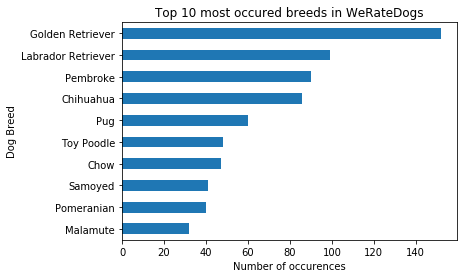

In [127]:
ax = top_breeds.plot.barh();
ax.set_xlabel('Number of occurences');
ax.set_ylabel('Dog Breed');
ax.set_title('Top 10 most occured breeds in WeRateDogs')

##### Prediction Confidence Metric

In [128]:
# A metric that may show the confidence of the prediction algorithm
twitter_archive_df_clean.prediction_confidence.mean()

0.4821501644128177

##### The prediction confidence average of top 10 dog breeds found in WeRateDogs

In [129]:
conf_mean = twitter_archive_df_clean.groupby(by='prediction').prediction_confidence.mean().sort_values()

In [130]:
top_10_breeds = ['Malamute', 'Pomeranian', 'Samoyed', 'Chow', 'Toy Poodle', 'Pug',
       'Chihuahua', 'Pembroke', 'Labrador Retriever', 'Golden Retriever']
top_10_breeds_conf_mean=[]
for i in top_10_breeds:
    top_10_breeds_conf_mean.append(conf_mean[i].round(4))

In [131]:
s = pd.Series(top_10_breeds_conf_mean, top_10_breeds)

In [132]:
s = s.sort_values()

Text(0.5, 1.0, 'The prediction confidence average of most occurred dog breeds found in WeRateDogs')

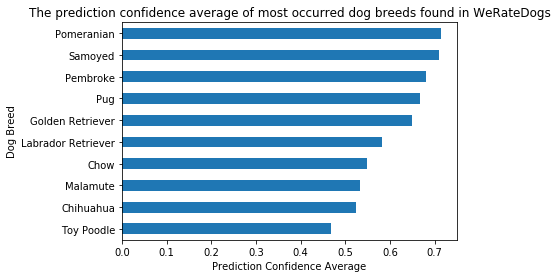

In [133]:
ax= s.plot.barh();
ax.set_xlabel('Prediction Confidence Average');
ax.set_ylabel('Dog Breed');
ax.set_title('The prediction confidence average of most occurred dog breeds found in WeRateDogs')

##### The retweets and favorite counts average of top 10 dog breeds found in WeRateDogs 

In [134]:
re_mean = twitter_archive_df_clean.groupby(by='prediction').retweet_count.mean()
fav_mean = twitter_archive_df_clean.groupby(by='prediction').favorite_count.mean()

In [135]:
top_10_breeds = ['Malamute', 'Pomeranian', 'Samoyed', 'Chow', 'Toy Poodle', 'Pug',
       'Chihuahua', 'Pembroke', 'Labrador Retriever', 'Golden Retriever']
top_10_breeds_r_mean=[]
top_10_breeds_fav_mean=[]
for i in top_10_breeds:
    top_10_breeds_r_mean.append(re_mean[i].astype(int))
    top_10_breeds_fav_mean.append(fav_mean[i].astype(int))

In [136]:
s1 = pd.Series(top_10_breeds_r_mean, top_10_breeds)
s2 = pd.Series(top_10_breeds_fav_mean, top_10_breeds)

In [137]:
s1 = s1.sort_values()
s2 = s2.sort_values()

In [138]:
df = pd.DataFrame({'Retweets Count Avg.':s1, 'Favorite Count Avg.':s2})

In [139]:
df = df.sort_values(by=['Favorite Count Avg.', 'Retweets Count Avg.'])

Text(0.5, 1.0, 'Retweets and favorites count of most occurred dog breeds found in WeRateDogs')

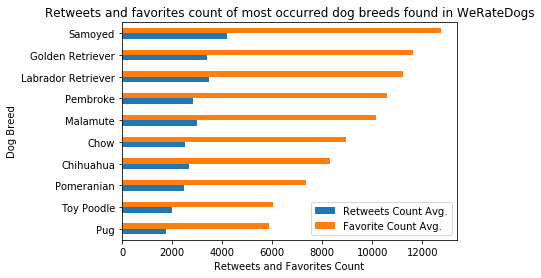

In [140]:
ax = df.plot.barh();
ax.set_xlabel('Retweets and Favorites Count');
ax.set_ylabel('Dog Breed');
ax.set_title('Retweets and favorites count of most occurred dog breeds found in WeRateDogs')

In [142]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1810 entries, 2017-08-01 16:23:56+00:00 to 2015-11-15 22:32:08+00:00
Data columns (total 14 columns):
tweet_id                 1810 non-null object
timestamp                1810 non-null datetime64[ns, UTC]
source                   1810 non-null category
text                     1810 non-null object
expanded_urls            1810 non-null object
rating_numerator         1810 non-null int64
rating_denominator       1810 non-null int64
name                     1810 non-null object
favorite_count           1810 non-null int32
retweet_count            1810 non-null int32
jpg_url                  1810 non-null object
img_num                  1810 non-null object
prediction               1810 non-null object
prediction_confidence    1810 non-null float64
dtypes: category(1), datetime64[ns, UTC](1), float64(1), int32(2), int64(2), object(7)
memory usage: 185.8+ KB


### The end of the study